In [9]:
import numpy as np
import ijson
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
from matplotlib import cm
import pandas as pd

In [13]:
with open('DataSets/SciFi_200000_TrackStudy.json', 'r') as f:
    event = 0
    eventList = []
    for item in ijson.items(f, "item"):
        eventList.append(item)
        event = event + 1
        if (event == 1000):
            break
df_from_json = pd.DataFrame(eventList)

In [11]:
# Data columns
i = 0
for val in df_from_json.columns:
    print(i," ",val)
    i = i + 1

0   ChID
1   ChID_Fraction
2   ChID_ID
3   ChID_Layer
4   ChID_Mat
5   ChID_Module
6   ChID_Quarter
7   ChID_SipmCell
8   ChID_SipmID
9   ChID_Station
10   CheatedSeeding_NHits
11   Down_strange
12   Down_strangeOver5
13   Down_strange_fromBD
14   Down_strange_fromBDOver5
15   Down_strange_noVelo
16   Down_strange_noVeloOver5
17   Down_strange_noVelo_fromBD
18   Down_strange_noVelo_fromDBOver5
19   Eta_in25
20   FiredLayers
21   FiredLayers_Counter
22   Long
23   LongOver5
24   Long_fromB
25   Long_fromBOver5
26   LowerX_noMultiple
27   MC
28   MCHit_Assoc_EntryX
29   MCHit_Assoc_EntryY
30   MCHit_Assoc_EntryZ
31   MCHit_Assoc_ExitX
32   MCHit_Assoc_ExitY
33   MCHit_Assoc_ExitZ
34   MCHit_Assoc_Particle_Key
35   MCHit_Assoc_X
36   MCHit_Assoc_Y
37   MCHit_Assoc_Z
38   MCHit_Assoc_time
39   MCHit_p
40   MCHit_pathlength
41   MCHit_tx
42   MCHit_ty
43   MCParticleID
44   MC_Charge
45   MC_Hit_Energy
46   MC_Hit_P
47   MC_Hit_Particle_Key
48   MC_Hit_Particle_P
49   MC_Hit_PathLenght
50  

In [14]:
# Get values, thus converting it to arrays
hits = df_from_json.values

In [15]:
import itertools

def showTracksMCHits(hitSet, elev, angle, max):
    
    fig = plt.figure(figsize=(19, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    i = 0
    # Iterate through all the particles keys obtained 
    for particle in hitSet:
        
        X = np.array(particle[50]).astype(float)
        Y = np.array(particle[51]).astype(float)
        Z = np.array(particle[52]).astype(float)
        
        ax.plot(X, Z, Y)
            
        i = i + 1
        if i == max:
            break
            
    ax.view_init(elev=elev, azim=angle)
    ax.grid()
    plt.show()

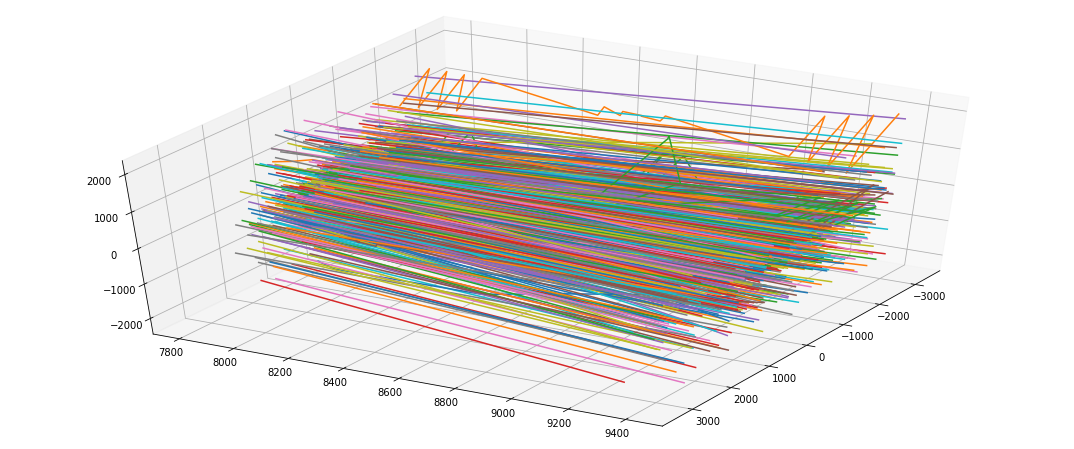

In [16]:
showTracksMCHits(hits, 45, 30, 1000)